<a href="https://colab.research.google.com/github/davidmorasalazar/Tarea-1/blob/main/Tarea_1_Macroeconometr%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

<center>
<img src="https://github.com/randall-romero/EC4301/blob/master/Laboratorios/Tema02-Ecuaciones/escuela-de-economia.png?raw=1" width="260" height="85">
</center>
<center>
    <b>EC4301 MACROECONOMETRÍA</b><br>
    <b>Estudiantes:  David Gerardo Mora Salazar, Manfred Ramírez Alfaro</b>
<br><br>
<b>Tarea 1:</b>
<div style="font-size:175%;color:white; background-color: #0064b0;">Profesor: Randall Romero Aguilar, PhD
</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Fecha límite de entrega: viernes 30 de abril de 2021, 6pm</div> 
</center>


## **Pregunta 1**

## Descargue los datos airquality del paquete datasets, el cual incluye información diaria de mediciones de la calidad del aire en Nueva York, de mayo a septiembre de 1973. Las variables incluidas son los niveles medios de ozono en Roosevelt Island Ozone, radiación solar en Central Park Solar.R, velocidad media del viento en el aeropuerto LaGuardia Wind, y temperatura máxima en el aeropuerto de LaGuardia Temp.

(a) Cargue los datos en un paquete estadístico de su elección. **(Stata, Python, o R)**

In [ ]:
print("Este cuaderno está corriendo en Google Colab. Es necesario instalar el siguiente paquete bccr para obtener los datos")
!pip install bccr
!pip install dash_extensions
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import xlrd
from bccr import SW
from scipy import stats
# Download data from web page
urla="https://vincentarelbundock.github.io/Rdatasets/csv/datasets/airquality.csv"
s1=requests.get(urla).content
a=pd.read_csv(io.StringIO(s1.decode('utf-8')))

## (b) Investigue la estructura de los datos


In [3]:
#Create variable Date:
a['dateInt']= "1973" + a['Month'].astype(str).str.zfill(2)+ a['Day'].astype(str).str.zfill(2)
a['Date'] = pd.to_datetime(a['dateInt'], format='%Y%m%d')

### (c) Haga un gráfico de cada una de las cuatro series mencionadas arriba.


Text(0.5, 1.0, 'Wind')

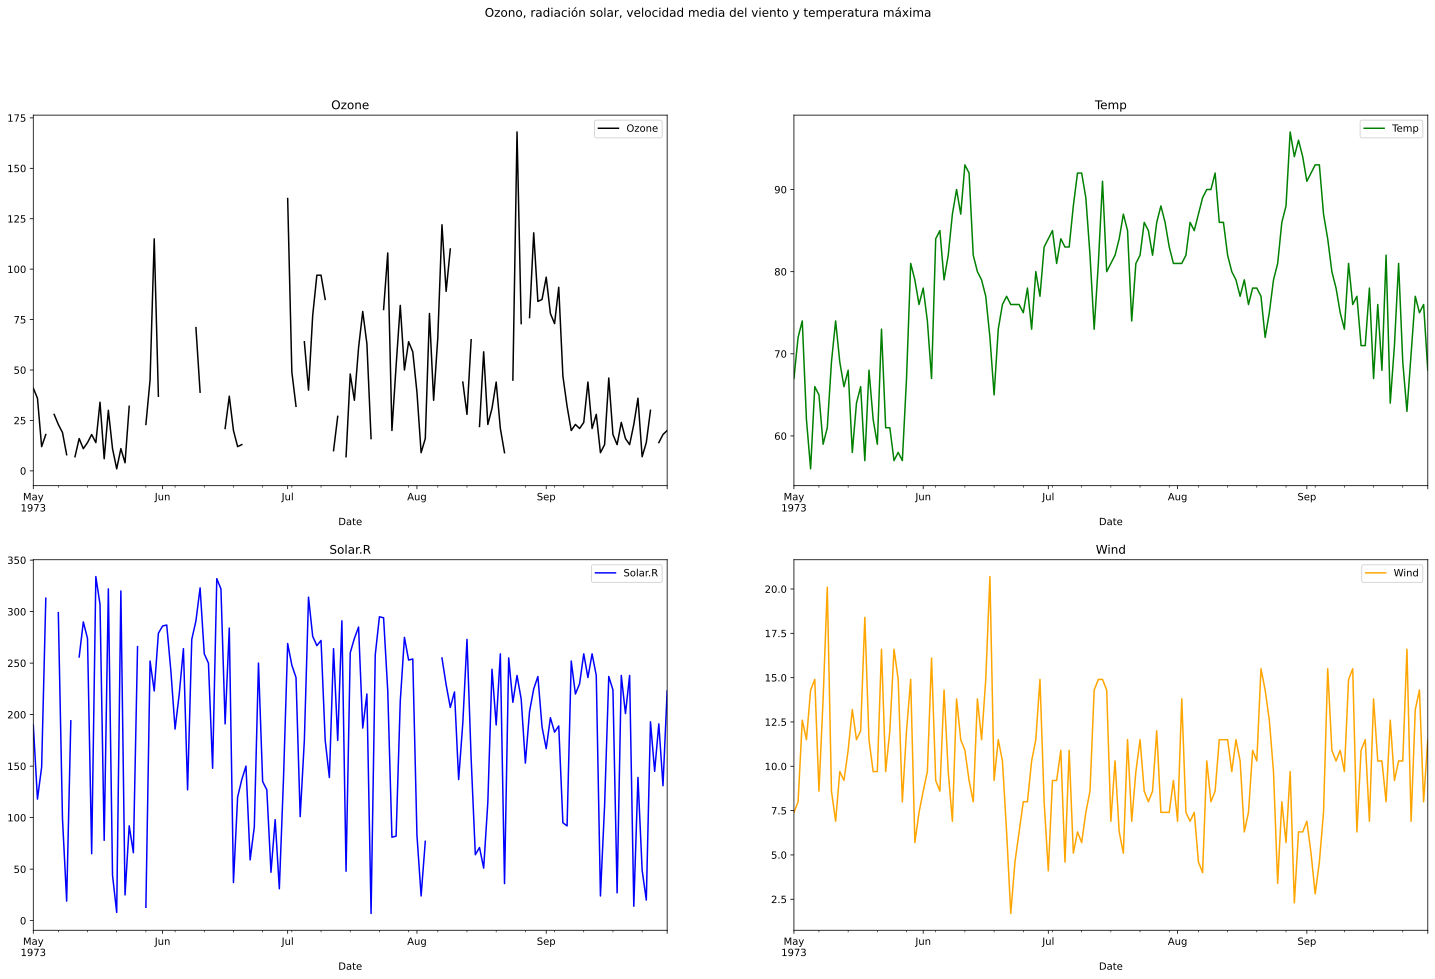

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))
fig.suptitle('Ozono, radiación solar, velocidad media del viento y temperatura máxima')
a.plot(ax=axes[0,0], x = "Date", y = "Ozone", color="k"); axes[0,0].set_title('Ozone')
a.plot(ax=axes[0,1],  x = "Date", y = "Temp", color="green"); axes[0,1].set_title('Temp')
a.plot(ax=axes[1,0], x = "Date", y = "Solar.R", color="blue"); axes[1,0].set_title('Solar.R')
a.plot(ax=axes[1,1], x = "Date", y = "Wind", color="orange"); axes[1,1].set_title('Wind')


### (d) Comente acerca del comportamiento de cada una de las series. ¿Observa algún asunto que requiera atención especial antes de desarrollar un modelo de series de tiempo para cada una de estas variables? Responda brevemente.

## **Pregunta 2**

##Descargue los datos AirPassengers del paquete datasets, el cual incluye información mensual de enero 1949 a diciembre 1960 del número de pasajeros aéreos internacionales value, del libro de Box, , Jenkins, y Reinsel (1976) Time Series Analysis, Forecasting and Control.
(a) Cargue los datos en un paquete estadístico de su elección. **(Stata, Python, o R)**


In [5]:
urlb="https://vincentarelbundock.github.io/Rdatasets/csv/datasets/AirPassengers.csv"
s2=requests.get(urlb).content
b=pd.read_csv(io.StringIO(s2.decode('utf-8')))


(b) Haga un gráfico de los datos y describa el comportamiento de la serie.

[Text(0, 0.5, 'Número de pasajeros'),
 Text(0.5, 0, 'Número del mes'),
 Text(0.5, 1.0, 'Información mensual de enero 1949 a diciembre 1960 del número de pasajeros aéreos internacionales')]

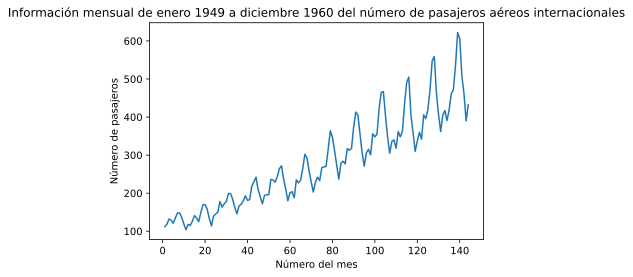

In [6]:
ax = sns.lineplot(data=b, x="Unnamed: 0", y="value")
ax.set(title="Información mensual de enero 1949 a diciembre 1960 del número de pasajeros aéreos internacionales", xlabel='Número del mes', ylabel='Número de pasajeros')


(c) Calcule el logaritmo natural de la serie y haga un gráfico de la serie resultante ¿Observa alguna
ventaja de usar el logaritmo de la serie (en vez de la serie original) para fines de modelación?
Responda brevemente.

[Text(0, 0.5, 'Logaritmo natural del número de pasajeros'),
 Text(0.5, 0, 'Número del mes'),
 Text(0.5, 1.0, 'Información mensual de enero 1949 a diciembre 1960 del número de pasajeros aéreos internacionales')]

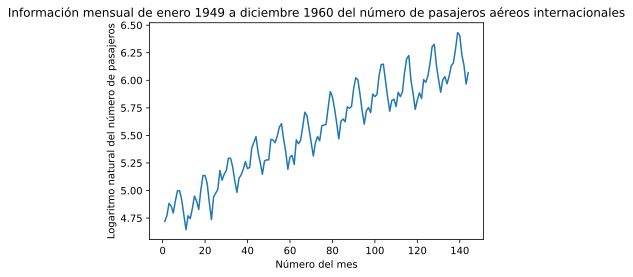

In [7]:
b['Natural logarithm of value'] = np.log(b['value'])
ax = sns.lineplot(data=b, x="Unnamed: 0", y="Natural logarithm of value")
ax.set(title="Información mensual de enero 1949 a diciembre 1960 del número de pasajeros aéreos internacionales", xlabel='Número del mes', ylabel='Logaritmo natural del número de pasajeros')

## **Pregunta 3**

##Obtenga datos del indice de precios al consumidor (IPC) en Costa Rica (disponibles en el sitio de Internet del Banco Central de Costa Rica). Calcule y grafique lo siguiente:
(a) la serie en nivel.


Método 1: 
Mediante la descarga de la base de datos directamente de [Indicadores económicos del Banco Central de Costa Rica](https://www.bccr.fi.cr/indicadores-economicos)

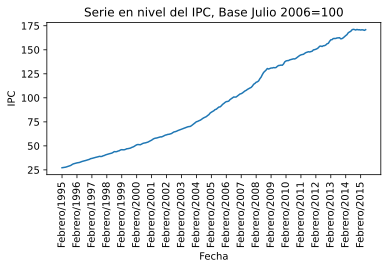

In [8]:
wb = xlrd.open_workbook('/IPC Julio 2006 = 100.xlsx')
sh1 = wb.sheet_by_name(u'ipccompu')
x = sh1.col_values(0)  # column 0
y = sh1.col_values(1)  # column 1
plt.plot(x[7:252], y[7:252])
plt.xticks(x[7:252][::12], rotation='vertical', fontsize=10)
plt.title("Serie en nivel del IPC, Base Julio 2006=100")    
plt.xlabel("Fecha")
plt.ylabel("IPC")
plt.subplots_adjust(bottom=0.35)
plt.show()


Método 2: Mediante la descarga de la base de datos através del paquete y librería de python: BCCR.

/usr/local/lib/python3.7/dist-packages/bccr/gee.py:685: UserWarning:


        En una futura versión, los indicadores deberán ser solicitados como pares de 'nombre=codigo', o bien 
        como un listado de enteros. Por ejemplo
            SW(TPM=3541, IMAE=913, Inflación=25485)
        o bien
            SW(3541, 913, 25485)                
        



Text(0, 0.5, 'IPC')

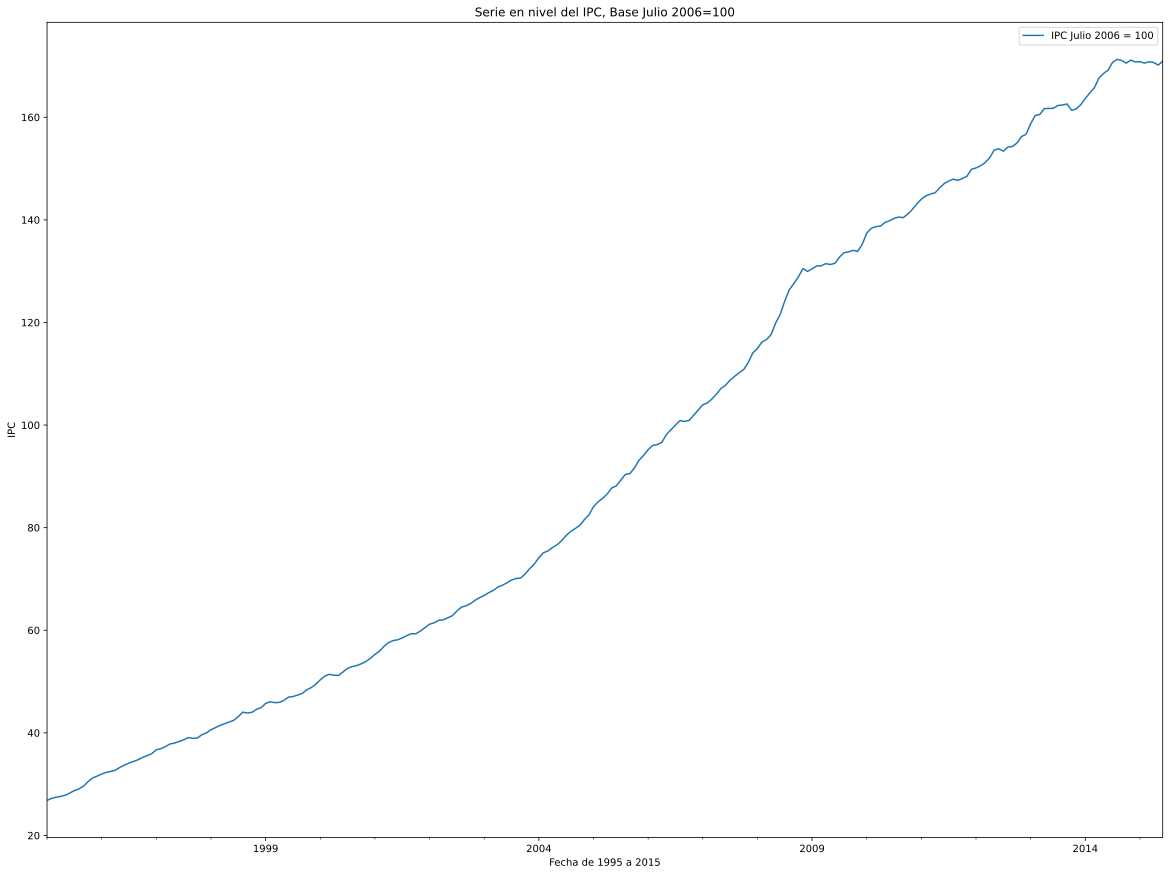

In [28]:
IPC = SW({979:'IPC Julio 2006 = 100'}, FechaInicio=1995)  # pasando un diccionario para renombrar las series
IPC.plot();
plt.title("Serie en nivel del IPC, Base Julio 2006=100")
plt.xlabel("Fecha de 1995 a 2015")
plt.ylabel("IPC")

Método 3: Este método genera una función utilizable para gran parte del resto de preguntas.

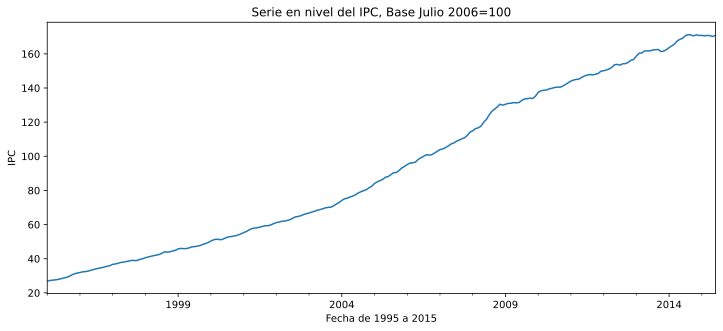

In [10]:
def figura(datos, titulo, y):
    fig, ax = plt.subplots(figsize=(12,5))
    ax = datos.plot(ax=ax, legend=None)
    ax.set(title=titulo, xlabel="Fecha de 1995 a 2015", ylabel=y)
    return 
figura(IPC,"Serie en nivel del IPC, Base Julio 2006=100", "IPC")

##Anotación:
Para los tres gráficos anteriores se tomó el indicador "[Índice general, Transables y No transables jul2006 = 100 (1984-2015)](https://gee.bccr.fi.cr/indicadoreseconomicos/Cuadros/frmVerCatCuadro.aspx?idioma=1&CodCuadro=%203009)"

(b) su primera diferencia.

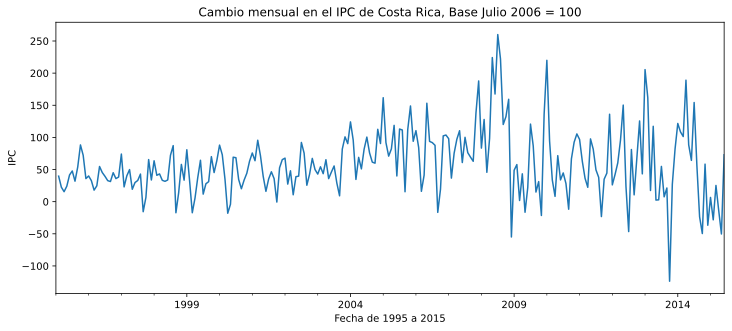

In [11]:
figura(100*IPC.diff(1),
       'Cambio mensual en el IPC de Costa Rica, Base Julio 2006 = 100',
       'IPC');

(c) Su tasa de crecimiento, y la primera diferencia del logaritmo de la serie (en un mismo gráfico)

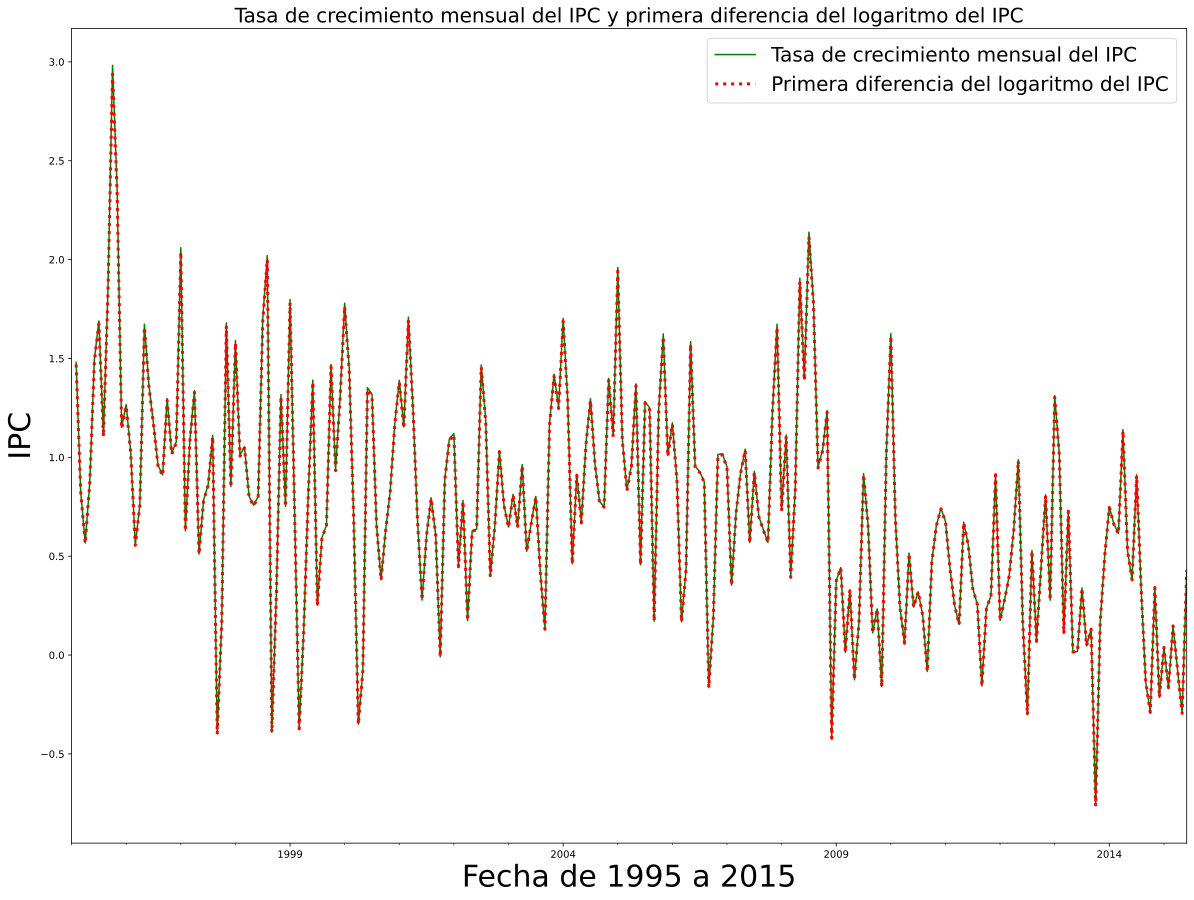

In [21]:
def figura1(dato1, dato2, leyenda1, leyenda2, titulo, y):
    variable_de_apoyo1 = dato1
    variable_de_apoyo2 = dato2
    IPCrespaldo = IPC.copy()
    IPCrespaldo['variable_de_apoyo1'] =variable_de_apoyo1
    IPCrespaldo['variable_de_apoyo2'] =variable_de_apoyo2
    IPCrespaldo['variable_de_apoyo1'].plot(color="green", label=leyenda1)
    IPCrespaldo['variable_de_apoyo2'].plot(linestyle="dotted", color = "red", linewidth="3", label=leyenda2)
    plt.rcParams["figure.figsize"] = (20,15)
    plt.legend(fontsize=20)
    plt.title(titulo, fontsize=20)
    plt.xlabel(xlabel= "Fecha de 1995 a 2015",fontsize=30)
    plt.ylabel(ylabel= y,fontsize=30)
    plt.show()        
    return
figura1(100*IPC.pct_change(1), 100*np.log(IPC).diff(1), "Tasa de crecimiento mensual del IPC", "Primera diferencia del logaritmo del IPC","Tasa de crecimiento mensual del IPC y primera diferencia del logaritmo del IPC", "IPC")   

(d) Su tasa de crecimiento interanual, y la diferencia estacional del logaritmo de la serie (en un mismo
gráfico)

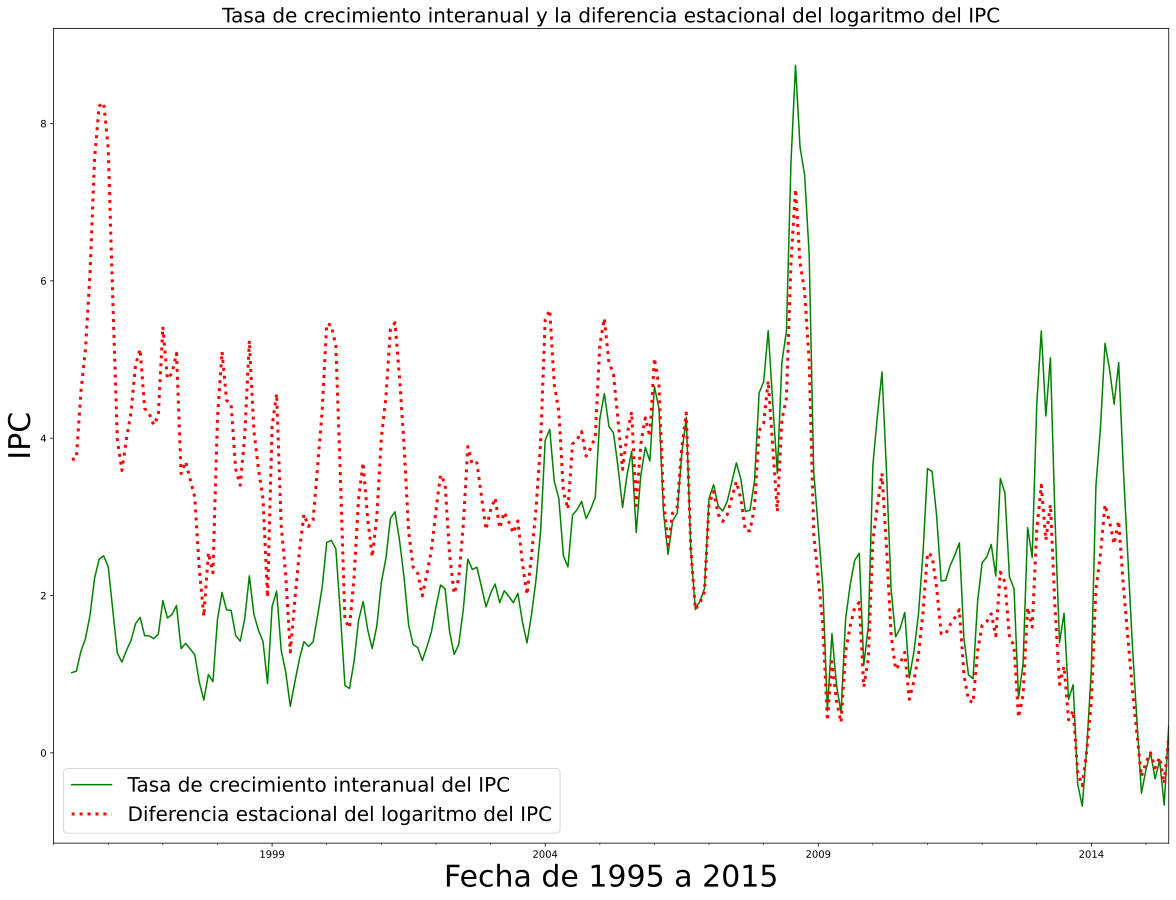

In [22]:
figura1(IPC.diff(4), 100*np.log(IPC).diff(4), "Tasa de crecimiento interanual del IPC", "Diferencia estacional del logaritmo del IPC","Tasa de crecimiento interanual y la diferencia estacional del logaritmo del IPC", "IPC")   

(e) Una serie trimestralizada, tomando el promedio de los 3 meses de cada trimestre.

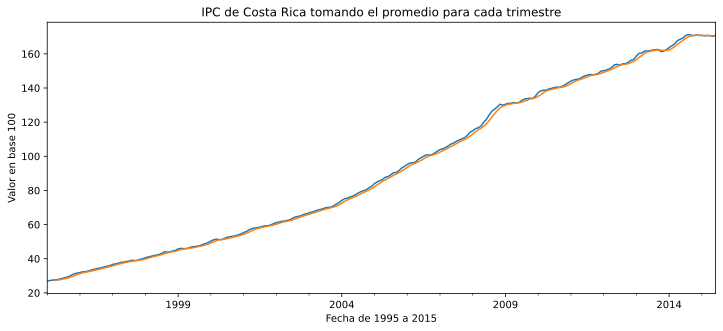

In [24]:
IPCsuavizadotrimestral = pd.concat([IPC, IPC.rolling(4).mean()], axis=1)
IPCsuavizadotrimestral.columns = ['Serie original', 'Serie suavizada']

figura(IPCsuavizadotrimestral,
    'IPC de Costa Rica tomando el promedio para cada trimestre',
    'Valor en base 100');

(f) una serie anualizada, tomando el promedio de los 12 meses de cada año.

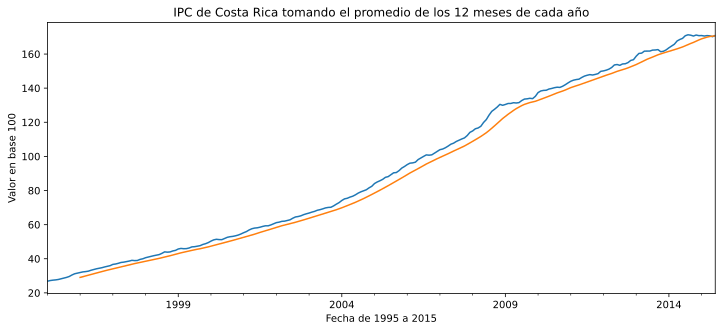

In [25]:
IPCsuavizadoanual = pd.concat([IPC, IPC.rolling(13).mean()], axis=1)
IPCsuavizadoanual.columns = ['Serie original', 'Serie suavizada']

figura(IPCsuavizadoanual,
    'IPC de Costa Rica tomando el promedio de los 12 meses de cada año',
    'Valor en base 100');

## **Pregunta 4**

##Utilice los datos del tipo de cambio del euro con respecto al dólar, disponibles en el sitio del curso (euro.csv), para contestar estas preguntas.
(a) Calcule la tasa de depreciación diaria como la primera diferencia del logaritmo natural del tipo de
cambio.

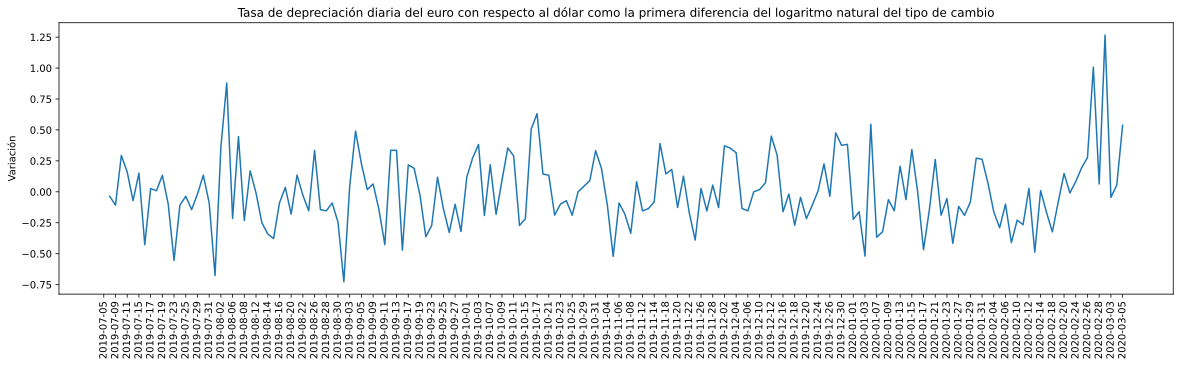

In [16]:
euroframe = pd.read_csv('/euro.csv')  
def figura3 (datos, indice_inicial, indice_final, titulo, y):
    fig3, ax = plt.subplots(figsize=(20,5))
    ax = sns.lineplot(data=datos, x =datos.fecha[indice_inicial:indice_final], y = 100*np.log(datos.euro[indice_inicial:indice_final]).diff(1) )
    ax.set(title=titulo, xlabel=" ", ylabel=y)    
    plt.xticks(rotation=90)
    plt.xticks(datos.fecha[indice_inicial:indice_final][::2])  
    return

figura3(euroframe, 5300, 5475, "Tasa de depreciación diaria del euro con respecto al dólar como la primera diferencia del logaritmo natural del tipo de cambio", "Variación")


(b) Tiene la depreciación diaria una distribución normal, según la prueba de Jarque-Bera?

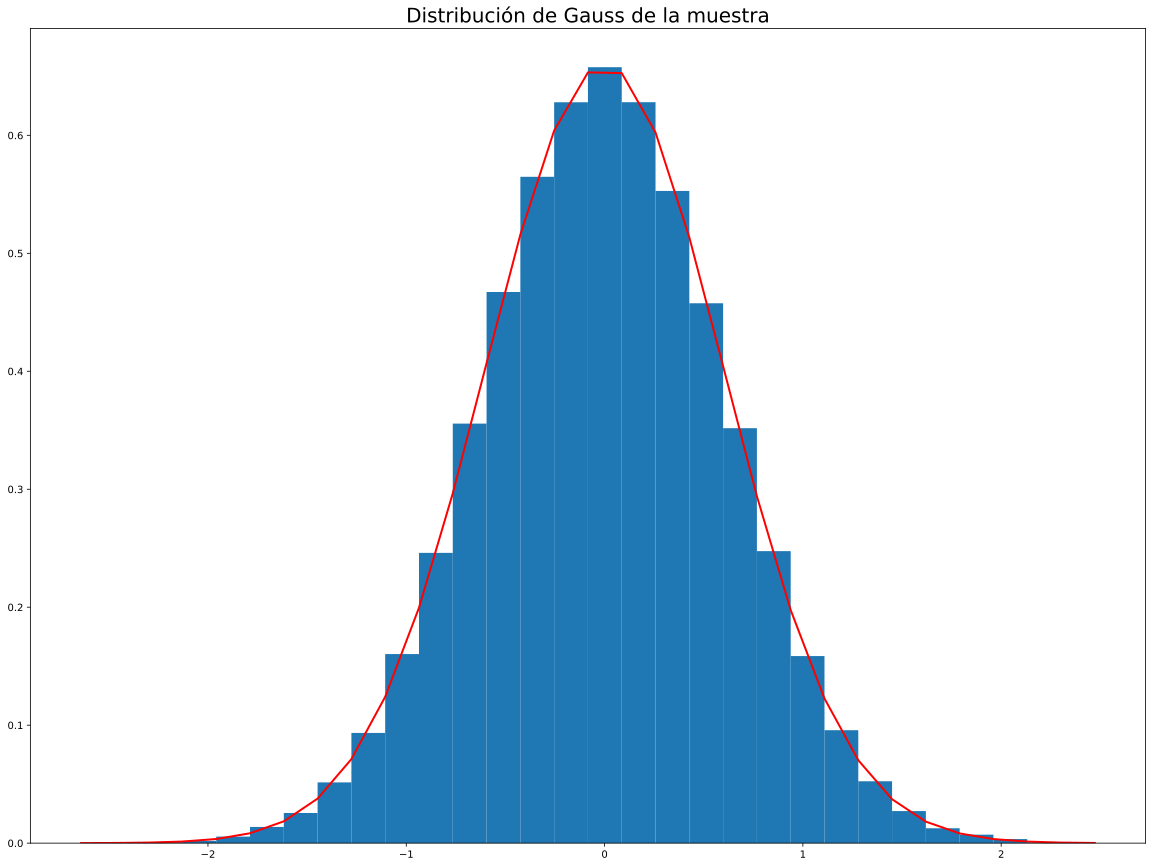

El valor del estadístico y el del P-Value son respectivamente: (4.716570798957938, 0.09458225503042839)


In [26]:
depreciación = 100*np.log(euroframe.euro[0:5476]).diff(1)
media = np.mean(depreciación)
desviacion = np.std(depreciación)
np.random.seed(987654321)
x = np.random.normal(media, desviacion, 100000)
#Histograma de la muestra
count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(desviacion * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - media)**2 / (2 * desviacion**2) ),
         linewidth=2, color='r')
plt.title("Distribución de Gauss de la muestra", fontsize=20)
plt.show()
#Prueba de jarque_bera
jarque_bera_test = stats.jarque_bera(x)
print("El valor del estadístico y el del P-Value son respectivamente:", jarque_bera_test)
#No se rechaza la hipótesis nula de distribución normal.

(c) A partir del gráfico de la serie de depreciación, diría usted que es covarianza-estacionaria? Justifique
su respuesta.

In [18]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [29]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Tarea_1_Macroeconometría.ipynb')